In [6]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw
import itertools
import numpy as np

In [2]:
def disp100mol(mol):
    display(Draw.MolToImage(mol,size=(100,100)))

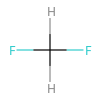


     RDKit          2D

  5  4  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  1  4  1  0
  1  5  1  0
M  END



In [3]:
r32=Chem.AddHs(Chem.MolFromSmiles('C(F)F'))
disp100mol(r32)
print(Chem.MolToMolBlock(r32))

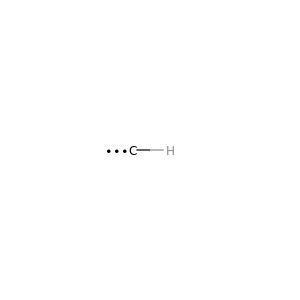


     RDKit          2D

  2  1  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  1  0  0  0  0  0  0
    1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
M  RAD  1   1   2
M  END



In [2]:
MthRad=Chem.AddHs(Chem.MolFromSmiles('[CH]'))
display(Draw.MolToImage(MthRad))
print(Chem.MolToMolBlock(MthRad))

In [3]:
from rdkit.Chem import Descriptors
Descriptors.NumRadicalElectrons(MthRad)

3

3


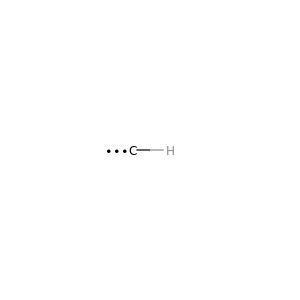

In [8]:
atm=MthRad.GetAtomWithIdx(0)
print(atm.GetNumRadicalElectrons())
display(Draw.MolToImage(MthRad))

In [7]:
atm.SetNumRadicalElectrons(3)

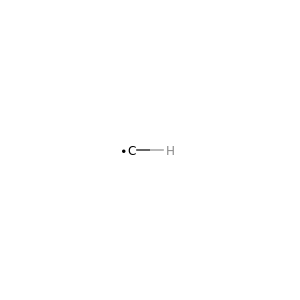

In [403]:
s_test='''
     RDKit          2D

  2  1  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  1  0  0  0  0  0  0
    1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
M  RAD  1   1   2
M  END'''
m_test=Chem.MolFromMolBlock(s_test,removeHs=False)
AllChem.Compute2DCoords(m_test)
display(Draw.MolToImage(m_test))

In [9]:
import itertools
import numpy as np

In [10]:
l_p_atm=['C','H','H','H','H']

l_mb=[]
l_b=[[0,0,1],[0,1,0],[1,0,0]]
n_hs=len(l_b)
l_hb=list(itertools.combinations_with_replacement(l_b, n_hs))
for j in range(len(l_hb)):
    l_hb_p=[]
    for i in range(n_hs):
        l_1hb=l_hb[j][i].copy()
        l_1hb.insert(i+1,0)
        l_hb_p.append(l_1hb)
    m_bh=np.array(l_hb_p)
    v_b_c=np.insert(m_bh[:,0],0,0)
    #炭素のarrayを作る
    m_b=np.concatenate([v_b_c[np.newaxis,:],m_bh],axis=0)
    #炭素のarrayと水素のarrayを結合
    if(np.all(m_b==m_b.T)):
        m_b[0,0]=4-m_b[0,:].sum()
        l_mb.append(m_b)
print(l_mb)

[array([[3, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]]), array([[1, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])]


In [4]:
class Compound:
    def __init__(self,i,j,l_o_atm,m_o_b):
        self.l_atm=[i,j]
        #i,ｊを新しく化合物に追加
        self.l_o_atm=l_o_atm.copy()
        #もとの原子リストをコピー
        self.d_atm={i:l_o_atm[i],j:l_o_atm[j]}
        #化合物内の原子辞書をつくる
        self.m_o_b=m_o_b
        #もとの隣接行列をコピー

    def addatm(self,i):
        self.l_atm.append(i)
        self.d_atm[i]=self.l_o_atm[i]
        #iを新しく化合物に追加

    def exatms(self,l_t_atm):
        self.l_atm.extend(l_t_atm)
        for i in l_t_atm:
            self.d_atm[i]=self.l_o_atm[i]
        #l_t_atmを新しく化合物に追加

    def calcAd(self):
        #化合物に属する原子を全部まとめ終わってから
        #隣接行列、隣接リストを算出
        l_adm=[]
        self.l_n_atm=[]
        for i in self.l_atm:
            l_adm.append(self.m_o_b[i,self.l_atm])
            self.l_n_atm.append(self.d_atm[i])
            #原子のリストも作る。
            
        self.m_adm=np.array(l_adm)
        
        self.l_adl=[]
        self.l_s_adl=[]
        self.n_rad=0
        self.l_rad=[]
        self.l_vlc=[0]*self.m_adm.shape[0]
        for i in range(self.m_adm.shape[0]):
            for j in range(i+1,self.m_adm.shape[1]):
                if(self.m_adm[i,j]==0):
                    continue
                self.l_adl.append([i,j,self.m_adm[i,j]])
                self.l_s_adl.append([str(i+1),str(j+1),str(self.m_adm[i,j])])
            if(self.m_adm[i,i]>0):
                self.n_rad+=1
                self.l_rad.append('   '+str(i+1)+'   2')
                self.l_vlc[i]=self.m_adm[i,:i].sum()+self.m_adm[i,i+1:].sum()
    
    def strMolB(self):
        n_atm=len(self.l_atm)
        n_bnd=len(self.l_adl)
        s_mb='\n'+' '*5+'Original'+' '*7+'2D'+'\n'
        s_mb=s_mb+'\n'+' '*2+str(n_atm)+' '*2+str(n_bnd)+'  0  0  0  0  0  0  0  0999 V2000'
        for i in range(self.m_adm.shape[0]):
            s_mb=s_mb+'\n'+'    0.0   '*3+' '+self.l_n_atm[i]+'   0'+'  0'*4+'  '+str(self.l_vlc[i])+'  0'*6
        for bond in self.l_s_adl:
            s_mb=s_mb+'\n'+' '*2+bond[0]+' '*2+bond[1]+' '*2+bond[2]+'  0'
        if(self.n_rad>0):
            s_mb=s_mb+'\nM  RAD  '+str(self.n_rad)
            for rad in self.l_rad:
                s_mb=s_mb+rad
        s_mb=s_mb+'\n'+'M  END'
        return s_mb
    
    def GenMol(self):
        #Molオブジェクトを作る
        self.calcAd()
        #隣接リストを作成し、
        self.cmol=Chem.MolFromMolBlock(self.strMolB(),removeHs=False)
        #MolBlockを作成し、そのMBからMolオブジェクトを生成
        AllChem.Compute2DCoords(self.cmol)
        #2次元座標を計算
        
        l_atms=list(self.cmol.GetAtoms())
        for i in range (self.m_adm.shape[0]):
            if(self.m_adm[i][i]>0):
                l_atms[i].SetNumRadicalElectrons(int(self.m_adm[i,i]))

In [377]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [373]:
m_b[0,:3].sum()+m_b[0,4:].sum()

3

In [ ]:
#aaabbblllfffcccsssxxxrrrpppiiimmmvvvvvv
#xxxxx.xxxxyyyyy.yyyyzzzzz.zzzz aaaddcccssshhhbbbvvvHHHrrriiimmmnnneee
#111222tttsssxxxrrrccc
#M RADnn8 aaa vvv

#  5  4  0  0  0  0  0  0  0  0999 V2000
#    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
#  1  2  1  0
#M  RAD  1   1   2

組み合わせ:0


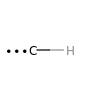

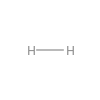


組み合わせ:1


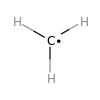

In [7]:
l_p_atm=['C','H','H','H','H']

l_mb=[]
l_b=[[0,0,1],[0,1,0],[1,0,0]]
n_hs=len(l_b)
l_hb=list(itertools.combinations_with_replacement(l_b, n_hs))
for j in range(len(l_hb)):
    l_hb_p=[]
    for i in range(n_hs):
        l_1hb=l_hb[j][i].copy()
        l_1hb.insert(i+1,0)
        l_hb_p.append(l_1hb)
    m_bh=np.array(l_hb_p)
    v_b_c=np.insert(m_bh[:,0],0,0)
    #炭素のarrayを作る
    m_b=np.concatenate([v_b_c[np.newaxis,:],m_bh],axis=0)
    #炭素のarrayと水素のarrayを結合
    if(np.all(m_b==m_b.T)):
        m_b[0,0]=4-m_b[0,:].sum()
        l_mb.append(m_b)

l_p_comp=[]
n_p_comb=0
for m_p_b in l_mb:
    for i in range(m_p_b.shape[0]):
        for j in range(m_p_b.shape[1]):
            if i>j:
                m_p_b[i,j]=m_p_b[j,i]

    d_atom = {}
    #どの原子がどの原子群に属しているかという辞書
    d_comp={}
    #原子群ごとにどの原子が属しているかという辞書
    d_lt={}
    comp_c=0
    for i in range(m_p_b.shape[0]):
        for j in range(i+1,m_p_b.shape[1]):
            if(m_p_b[i,j]==0):
                continue
            if i not in d_atom.keys():
                if j not in d_atom.keys():
                    d_atom[i]=comp_c
                    d_atom[j]=comp_c
                    d_comp[comp_c]=Compound(i,j,l_p_atm,m_p_b)
                    comp_c+=1
                    #i,ｊを新しく原子群に追加
                else:
                    d_atom[i]=d_atom[j]
                    d_comp[d_atom[j]].addatm(i)
                    #iをｊの属している原子群に
            else:
                if j not in d_atom.keys():
                    d_atom[j]=d_atom[i]
                    d_comp[d_atom[i]].addatm(j)
                    #iをｊの属している原子群に
                else:
                    if(d_atom[i]<d_atom[j]):
                        Comp=d_comp.pop(d_atom[j])
                        #つながっているとわかった原子群をpopで取り出す
                        d_comp[d_atom[i]].exatms(Comp.l_atm)
                        #番号の若い方に追加
                        for atm_num in Comp.l_atm:
                            d_atom[atm_num]=d_atom[i]
                            #つながっているわかった原子群の属する原子群を若い方に更新
                    elif(d_atom[i]>d_atom[j]):
                        Comp=d_comp.pop(d_atom[i])
                        #つながっているとわかった原子群をpopで取り出す
                        d_comp[d_atom[j]].exatms(Comp.l_atm)
                        #番号の若い方に追加
                        for atm_num in Comp.l_atm:
                            d_atom[atm_num]=d_atom[j]
    print('組み合わせ:'+str(n_p_comb))
    for k in d_comp:
        c=d_comp[k]
        c.GenMol()
        disp100mol(c.cmol)
    print()
    
    l_p_comp.append(d_comp.copy())
    n_p_comb+=1

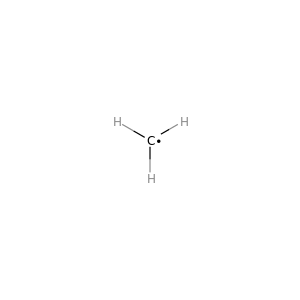

In [389]:
m_test=Chem.MolFromMolBlock(c.strMolB(),removeHs=False)
AllChem.Compute2DCoords(m_test)
display(Draw.MolToImage(m_test))

In [357]:
l_p_atm=['C','C','H','H','H','H']
m_b=np.array([[0,3,1,0,0,0],[3,0,0,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,1],[0,0,0,0,0,0]])
for i in range(m_b.shape[0]):
    for j in range(m_b.shape[1]):
        if i>j:
            m_b[i,j]=m_b[j,i]
# print(m_b)
                
d_atom = {}
#どの原子がどの原子群に属しているかという辞書
d_comp={}
#原子群ごとにどの原子が属しているかという辞書
d_lt={}
comp_c=0
for i in range(m_b.shape[0]):
    for j in range(i+1,m_b.shape[1]):
        if(m_b[i,j]==0):
            continue
        if i not in d_atom.keys():
            if j not in d_atom.keys():
                d_atom[i]=comp_c
                d_atom[j]=comp_c
                d_comp[comp_c]=Compound(i,j,l_p_atm,m_b)
                comp_c+=1
                #i,ｊを新しく原子群に追加
            else:
                d_atom[i]=d_atom[j]
                d_comp[d_atom[j]].addatm(i)
                #iをｊの属している原子群に
        else:
            if j not in d_atom.keys():
                d_atom[j]=d_atom[i]
                d_comp[d_atom[i]].addatm(j)
                #iをｊの属している原子群に
            else:
                if(d_atom[i]<d_atom[j]):
                    Comp=d_comp.pop(d_atom[j])
                    #つながっているとわかった原子群をpopで取り出す
                    d_comp[d_atom[i]].exatms(Comp.l_atm)
                    #番号の若い方に追加
                    for atm_num in Comp.l_atm:
                        d_atom[atm_num]=d_atom[i]
                        #つながっているわかった原子群の属する原子群を若い方に更新
                elif(d_atom[i]>d_atom[j]):
                    Comp=d_comp.pop(d_atom[i])
                    #つながっているとわかった原子群をpopで取り出す
                    d_comp[d_atom[j]].exatms(Comp.l_atm)
                    #番号の若い方に追加
                    for atm_num in Comp.l_atm:
                        d_atom[atm_num]=d_atom[j]

for k in d_comp:
    d_comp[k].calcAd()
    c=d_comp[k]
#     print(k,c.d_atm,c.l_atm,'\n',c.l_adl,c.l_n_atm)
    print(c.strMolB())


     Original       2D

  4  3  0  0  0  0  0  0  0  0999 V2000
    0.0       0.0       0.0    C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  3  0
  1  3  1  0
  2  4  1  0
M  END

     Original       2D

  2  1  0  0  0  0  0  0  0  0999 V2000
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
M  END


In [339]:
l_hb

[([0, 0, 1], [0, 0, 1], [0, 0, 1]),
 ([0, 0, 1], [0, 0, 1], [0, 1, 0]),
 ([0, 0, 1], [0, 0, 1], [1, 0, 0]),
 ([0, 0, 1], [0, 1, 0], [0, 1, 0]),
 ([0, 0, 1], [0, 1, 0], [1, 0, 0]),
 ([0, 0, 1], [1, 0, 0], [1, 0, 0]),
 ([0, 1, 0], [0, 1, 0], [0, 1, 0]),
 ([0, 1, 0], [0, 1, 0], [1, 0, 0]),
 ([0, 1, 0], [1, 0, 0], [1, 0, 0]),
 ([1, 0, 0], [1, 0, 0], [1, 0, 0])]

In [86]:
for i in range(4):
    for j in range(4):
        if i>j:
            if(m_b[i,j]>0):
                print(i,j,m_b[i,j])

1 0 1
2 0 1
3 0 1


In [345]:
l_p_atm=['C','C','H','H','H','H']
m_b=np.array([[0,3,1,0,0,0],[3,0,0,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,1],[0,0,0,0,0,0]])
for i in range(m_b.shape[0]):
    for j in range(m_b.shape[1]):
        if i>j:
            m_b[i,j]=m_b[j,i]
# print(m_b)
                
d_atom = {}
#どの原子がどの原子群に属しているかという辞書
d_comp={}
#原子群ごとにどの原子が属しているかという辞書
d_lt={}
comp_c=0
for i in range(m_b.shape[0]):
    for j in range(i+1,m_b.shape[1]):
        if(m_b[i,j]==0):
            continue
        if i not in d_atom.keys():
            if j not in d_atom.keys():
                d_atom[i]=comp_c
                d_atom[j]=comp_c
                d_comp[comp_c]=Compound(i,j,l_p_atm,m_b)
                comp_c+=1
                #i,ｊを新しく原子群に追加
            else:
                d_atom[i]=d_atom[j]
                d_comp[d_atom[j]].addatm(i)
                #iをｊの属している原子群に
        else:
            if j not in d_atom.keys():
                d_atom[j]=d_atom[i]
                d_comp[d_atom[i]].addatm(j)
                #iをｊの属している原子群に
            else:
                if(d_atom[i]<d_atom[j]):
                    Comp=d_comp.pop(d_atom[j])
                    #つながっているとわかった原子群をpopで取り出す
                    d_comp[d_atom[i]].exatms(Comp.l_atm)
                    #番号の若い方に追加
                    for atm_num in Comp.l_atm:
                        d_atom[atm_num]=d_atom[i]
                        #つながっているわかった原子群の属する原子群を若い方に更新
                elif(d_atom[i]>d_atom[j]):
                    Comp=d_comp.pop(d_atom[i])
                    #つながっているとわかった原子群をpopで取り出す
                    d_comp[d_atom[j]].exatms(Comp.l_atm)
                    #番号の若い方に追加
                    for atm_num in Comp.l_atm:
                        d_atom[atm_num]=d_atom[j]

for k in d_comp:
    d_comp[k].calcAd()
    c=d_comp[k]
#     print(k,c.d_atm,c.l_atm,'\n',c.l_adl,c.l_n_atm)
    print(c.strMolB())


     Original       2D

  4  3  0  0  0  0  0  0  0  0999 V2000
    0.0       0.0       0.0    C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  3  0
  1  3  1  0
  2  4  1  0
M  END

     Original       2D

  2  1  0  0  0  0  0  0  0  0999 V2000
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
M  END


In [ ]:
for k in d_comp:
    d_comp[k].calcAd()
    c=d_comp[k]
#     print(k,c.d_atm,c.l_atm,'\n',c.l_adl,c.l_n_atm)
    m_test=Chem.MolFromMolBlock(c.strMolB(),removeHs=False)
    AllChem.Compute2DCoords(m_test)
    display(Draw.MolToImage(m_test))

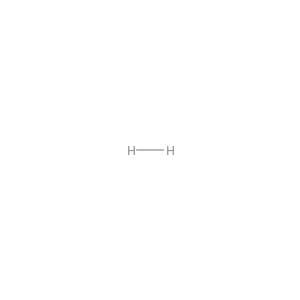

In [332]:
m_test=Chem.MolFromMolBlock(c.strMolB(),removeHs=False)
AllChem.Compute2DCoords(m_test)
Draw.MolToImage(m_test)

In [331]:
c.strMolB()

'\n     Original       2D\n\n  2  1  0  0  0  0  0  0  0  0999 V2000\n    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0\n    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2  1  0\nM  END'

In [286]:
d_comp[0].calcAdL()
d_comp[0].m_b_adl

array([[0, 3, 1, 0],
       [3, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [244]:
l_p_atm=['C','C','H','H','H','H']
m_b=np.array([[0,3,1,0,0,0],[3,0,0,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])
for i in range(m_b.shape[0]):
    for j in range(m_b.shape[1]):
        if i>j:
            m_b[i,j]=m_b[j,i]
print(m_b)
                
d_atom = {}
#どの原子がどの原子群に属しているかという辞書
d_comp={}
#原子群ごとにどの原子が属しているかという辞書
d_lt={}
comp_c=0
for i in range(m_b.shape[0]):
    for j in range(i+1,m_b.shape[1]):
        if(m_b[i,j]==0):
            continue
        if i not in d_atom.keys():
            if j not in d_atom.keys():
                d_atom[i]=comp_c
                d_atom[j]=comp_c
                d_comp[comp_c]=[i,j]
                comp_c+=1
                #i,ｊを新しく原子群に追加
            else:
                d_atom[i]=d_atom[j]
                d_comp[d_atom[j]].append(i)
                #iをｊの属している原子群に
        else:
            if j not in d_atom.keys():
                d_atom[j]=d_atom[i]
                d_comp[d_atom[i]].append(j)
            else:
                if(d_atom[i]<d_atom[j]):
                    l_atm_t=d_comp.pop(d_atom[j])
                    #つながっているとわかった原子群をpopで取り出す
                    d_comp[d_atom[i]].extend(l_atm_t)
                    #番号の若い方に追加
                    for atm_num in l_atm_t:
                        d_atom[atm_num]=d_atom[i]
                        #つながっているわかった原子群の属する原子群を若い方に更新
                elif(d_atom[i]>d_atom[j]):
                    l_atm_t=d_comp.pop(d_atom[i])
                    for atm_num in l_atm_t:
                        d_atom[atm_num]=d_atom[j]
                    d_comp[d_atom[j]].extend(l_atm_t)
#         if j not in compounds.keys():
#             compounds[j]=[comp_c]
print(d_atom)
print(d_comp)

[[0 3 1 0 0 0]
 [3 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
{0: 0, 1: 0, 2: 0, 3: 0}
{0: [0, 1, 2, 3]}


In [279]:
l_c_atm=[]
l_m_c=[]
for k in d_comp:
    m_cb=[]
    for atm in d_comp[k]:
        m_cb.append(m_b[atm,d_comp[k]])
    l_c_atm.append(list(itemgetter(*d_comp[k])(l_p_atm)))
    l_m_c.append(np.array(m_cb))
print(l_c_atm)
print(l_m_c)

TypeError: 'Compound' object is not iterable

In [233]:
l_l_b_map=[]
for m_c in l_m_c:
    l_b_map=[]
    for i in range(m_c.shape[0]):
        for j in range(i+1,m_c.shape[1]):
            if(m_c[i,j]==0):
                continue
            l_b_map.append([i,j,m_c[i,j]])
    l_l_b_map.append(l_b_map)
l_l_b_map

[[[0, 1, 3], [0, 2, 1], [1, 3, 1]]]

In [240]:
for i in range(len(l_c_atm)):
    print(' '*2+str(len(l_c_atm[i]))+' '*2+str(len(l_l_b_map[i]))+'  0  0  0  0  0  0  0  0999 V2000')
    for atm in l_c_atm[i]:
        print('    0.0   '*3+' '+atm+'   0'+'  0'*11)
    for l_b_map in l_l_b_map[i]:
        print(' '*2+str(l_b_map[0]+1)+' '*2+str(l_b_map[1]+1)+' '*2+str(l_b_map[2])+'  0')

  4  3  0  0  0  0  0  0  0  0999 V2000
    0.0       0.0       0.0    C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  3  0
  1  3  1  0
  2  4  1  0


In [241]:
s_test='''
     RDKit          2D

  4  3  0  0  0  0  0  0  0  0999 V2000
    0.0       0.0       0.0    C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0       0.0       0.0    H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  3  0
  1  3  1  0
  2  4  1  0
M  END'''

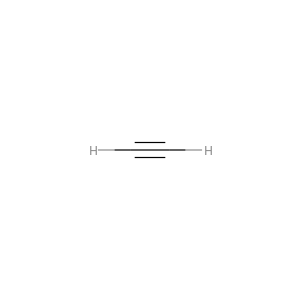

In [243]:
test_m=Chem.MolFromMolBlock(s_test,removeHs=False)
AllChem.Compute2DCoords(test_m)
Draw.MolToImage(test_m)

In [ ]:
len(l_l_b_map[i])



  1  2  1  0

In [182]:
from operator import itemgetter
list(itemgetter(*d_comp[k])(l_p_atm))

['C', 'C', 'H', 'H']

In [164]:
m_cs

[array([[0, 1, 1, 0],
        [1, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0]]), array([[0, 1],
        [1, 0]])]

In [130]:
l_1hb.extend([2,30,3])

In [131]:
l_1hb

[1, 0, 0, 0, 2, 30, 3]

In [122]:
m_b.shape[0]

3

In [110]:
m_b

array([[0, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [1, 1, 0, 0]])

In [ ]:
{'Utsunomiya': ['Mito', 'Maebashi', 'Saitama', 'Chiba', 'Tokyo'], 'Wakayama': ['Kyoto', 'Osaka', 'Kobe', 'Nara', 'Tokushima'], 'Nagasaki': ['Saga', 'Kumamoto'], 'Tokyo': ['Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Yokohama'], 'Okayama': ['Tottori', 'Tokushima', 'Takamatsu'], 'Miyazaki': ['Kagoshima'], 'Nagano': ['Maebashi', 'Toyama'], 'Toyama': ['Kanazawa', 'Nagano'], 'Maebashi': ['Utsunomiya', 'Saitama', 'Tokyo', 'Kofu', 'Nagano'], 'Nagoya': ['Gifu', 'Tsu'], 'Chiba': ['Mito', 'Utsunomiya', 'Saitama', 'Tokyo', 'Yokohama'], 'Sendai': ['Yamagata', 'Fukushima'], 'Tokushima': ['Kobe', 'Wakayama', 'Okayama', 'Takamatsu'], 'Kofu': ['Maebashi', 'Shizuoka'], 'Oita': ['Yamaguchi', 'Kumamoto'], 'Kobe': ['Otsu', 'Kyoto', 'Osaka', 'Nara', 'Wakayama', 'Tokushima'], 'Otsu': ['Gifu', 'Tsu', 'Kyoto', 'Osaka', 'Kobe', 'Nara'], 'Tsu': ['Gifu', 'Nagoya', 'Otsu', 'Kyoto', 'Osaka', 'Nara'], 'Nara': ['Tsu', 'Otsu', 'Kyoto', 'Osaka', 'Kobe', 'Wakayama'], 'Hiroshima': ['Matsuyama'], 'Matsuyama': ['Hiroshima', 'Kochi'], 'Fukui': ['Kanazawa', 'Gifu'], 'Kagoshima': ['Miyazaki'], 'Saitama': ['Mito', 'Utsunomiya', 'Maebashi', 'Chiba', 'Tokyo', 'Yokohama'], 'Fukuoka': ['Saga', 'Kumamoto'], 'Takamatsu': ['Okayama', 'Tokushima', 'Kochi'], 'Saga': ['Fukuoka', 'Nagasaki', 'Kumamoto'], 'Kyoto': ['Tsu', 'Otsu', 'Osaka', 'Kobe', 'Nara', 'Wakayama'], 'Osaka': ['Tsu', 'Otsu', 'Kyoto', 'Kobe', 'Nara', 'Wakayama'], 'Gifu': ['Fukui', 'Nagoya', 'Tsu', 'Otsu'], 'Shizuoka': ['Kofu'], 'Kumamoto': ['Fukuoka', 'Saga', 'Nagasaki', 'Oita'], 'Mito': ['Utsunomiya', 'Saitama', 'Chiba', 'Tokyo'], 'Yokohama': ['Saitama', 'Chiba', 'Tokyo'], 'Fukushima': ['Sendai', 'Yamagata'], 'Yamagata': ['Sendai', 'Fukushima'], 'Yamaguchi': ['Oita'], 'Kanazawa': ['Toyama', 'Fukui'], 'Tottori': ['Okayama'], 'Kochi': ['Takamatsu', 'Matsuyama']}

In [100]:
list(range(2,10,2))

[2, 4, 6, 8]

In [83]:
m_b[1][m_b[1]>0]

array([1])

In [62]:
m_b=np.array(l_hb_p)
v_b_c=np.insert(m_b[:,0],0,0)
np.concatenate([v_b_c[np.newaxis,:],m_b],axis=0)

array([[0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

array([[0, 1, 1, 1]])

In [29]:
l_hb[0]

([0, 0, 1], [0, 0, 1], [0, 0, 1])

In [27]:
l_hb[0][0]

[0, 0, 1]